<a href="https://colab.research.google.com/github/BrianNguyen0305/ML_TradeBot_Alpaca_Orb/blob/main/First_ORB_QQQ_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


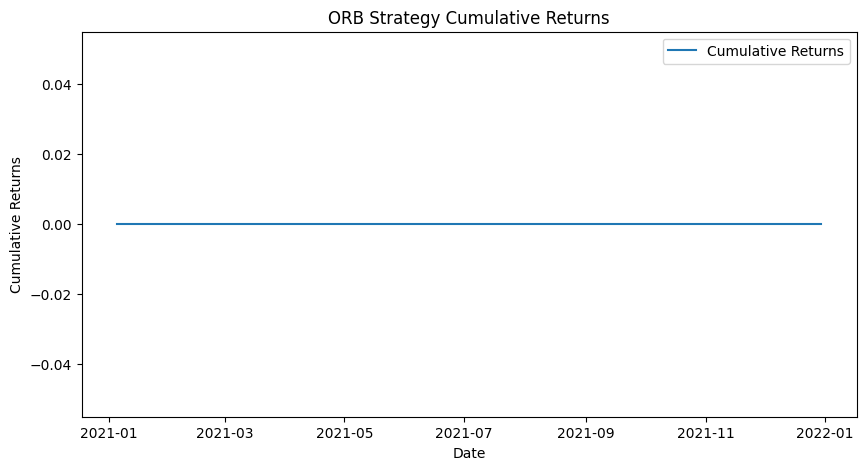

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_historical_data(symbol, start_date, end_date):
    """Fetches historical data from Yahoo Finance."""
    data = yf.download(symbol, start=start_date, end=end_date)
    data.index = pd.to_datetime(data.index)  # Convert index to DatetimeIndex
    return data

def calculate_orb(data, opening_range_minutes=30):
    """Calculates the Opening Range Breakout (ORB) for each trading day."""
    orb_data = pd.DataFrame()

    # Iterate through each unique day in the data
    for date in data.index.normalize().unique():
        day_data = data[data.index.normalize() == date]  # Ensure we filter data for the specific day
        if not day_data.empty:
            start_time = date.replace(hour=9, minute=30)
            end_time = start_time + pd.Timedelta(minutes=opening_range_minutes)
            opening_range_data = day_data[(day_data.index >= start_time) & (day_data.index <= end_time)]

            if not opening_range_data.empty:
                orb_high = opening_range_data['High'].max()
                orb_low = opening_range_data['Low'].min()
                orb_data = orb_data.append(pd.DataFrame({'ORB_High': [orb_high], 'ORB_Low': [orb_low]}, index=[date]))

    return orb_data

def backtest_strategy(data, orb_data):
    """Applies the ORB strategy to historical data for backtesting."""
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0

    for date, orb in orb_data.iterrows():
        if date in data.index:
            buy_signal = data.loc[date:, 'High'] >= orb['ORB_High']
            sell_signal = data.loc[date:, 'Low'] <= orb['ORB_Low']
            signals.loc[date:, 'Signal'] = np.where(buy_signal, 1, np.where(sell_signal, -1, 0))

    data['Strategy Returns'] = data['Adj Close'].pct_change() * signals['Signal'].shift(1)
    cumulative_returns = data['Strategy Returns'].cumsum()

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_returns, label='Cumulative Returns')
    plt.title('ORB Strategy Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

    return cumulative_returns

if __name__ == "__main__":
    # Example usage
    symbol = 'QQQ'
    start_date = '2021-01-01'
    end_date = '2021-12-31'
    data = fetch_historical_data(symbol, start_date, end_date)
    orb_data = calculate_orb(data)
    results = backtest_strategy(data, orb_data)


In [32]:
orb_data

""


In [35]:
calculate_orb(data)

""


In [29]:
data[data.index.normalize() == date]

NameError: name 'date' is not defined

[*********************100%%**********************]  1 of 1 completed


Data fetched successfully:                                  Open        High         Low       Close  \
Datetime                                                                    
2024-04-01 09:30:00-04:00  444.649994  445.021301  444.600006  444.649994   
2024-04-01 09:31:00-04:00  444.649994  444.825012  444.549988  444.779999   
2024-04-01 09:32:00-04:00  444.769989  445.339996  444.760010  445.310791   
2024-04-01 09:33:00-04:00  445.359985  445.899994  445.309998  445.760010   
2024-04-01 09:34:00-04:00  445.760010  446.190002  445.690613  446.170013   

                            Adj Close   Volume  
Datetime                                        
2024-04-01 09:30:00-04:00  444.649994  1118054  
2024-04-01 09:31:00-04:00  444.779999   194952  
2024-04-01 09:32:00-04:00  445.310791   157150  
2024-04-01 09:33:00-04:00  445.760010   275622  
2024-04-01 09:34:00-04:00  446.170013   171109  
Processing date: 2024-04-01 00:00:00-04:00, data available: False
Opening range data for 2

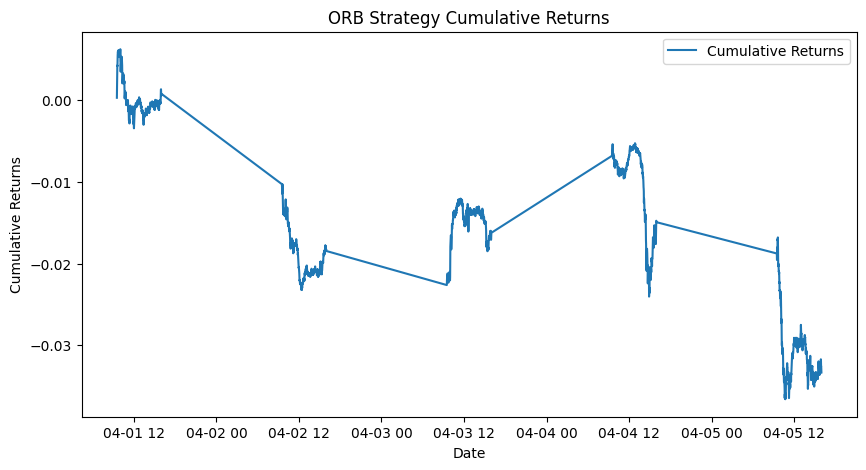

In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_historical_data(symbol, start_date, end_date):
    """Fetches historical data from Yahoo Finance."""
    data = yf.download(symbol, start=start_date, end=end_date, interval="1m")
    data.index = pd.to_datetime(data.index)  # Convert index to DatetimeIndex
    print("Data fetched successfully:", data.head())  # Debug output to verify data
    return data.between_time('09:30', '16:00')  # Focus only on market hours

def calculate_orb(data, opening_range_minutes=30):
    """Calculates the Opening Range Breakout (ORB) for each trading day."""
    orb_data = pd.DataFrame()

    for date in data.index.normalize().unique():  # Ensure we're only getting unique days
        day_data = data[data.index.normalize() == date]  # Filter data for each specific day
        print(f"Processing date: {date}, data available: {day_data.empty}")  # Debug output

        if not day_data.empty:
            start_time = date.replace(hour=9, minute=30)
            end_time = start_time + pd.Timedelta(minutes=opening_range_minutes)
            opening_range_data = day_data[(day_data.index >= start_time) & (day_data.index <= end_time)]

            print(f"Opening range data for {date}: {opening_range_data}")  # Debug output

            if not opening_range_data.empty:
                orb_high = opening_range_data['High'].max()
                orb_low = opening_range_data['Low'].min()
                orb_data.loc[date, 'ORB_High'] = orb_high
                orb_data.loc[date, 'ORB_Low'] = orb_low

    return orb_data

def backtest_strategy(data, orb_data):
    """Applies the ORB strategy to historical data for backtesting."""
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0

    for date, orb in orb_data.iterrows():
        buy_signal = data['High'] >= orb['ORB_High']
        sell_signal = data['Low'] <= orb['ORB_Low']
        signals.loc[buy_signal, 'Signal'] = 1
        signals.loc[sell_signal, 'Signal'] = -1

    data['Strategy Returns'] = data['Adj Close'].pct_change() * signals['Signal'].shift(1)
    cumulative_returns = data['Strategy Returns'].cumsum()

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_returns, label='Cumulative Returns')
    plt.title('ORB Strategy Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

    return cumulative_returns

if __name__ == "__main__":
    # Example usage
    symbol = 'QQQ'
    start_date = '2024-04-01'
    end_date = '2024-04-07'
    data = fetch_historical_data(symbol, start_date, end_date)
    if not data.empty:
        orb_data = calculate_orb(data)
        if not orb_data.empty:
            results = backtest_strategy(data, orb_data)
        else:
            print("ORB data is empty, no breakouts detected.")
    else:
        print("No data fetched, check date range and symbol.")
